# **Hand Written Digit Prediction - Classification Analysis**

-------------

## **Objective**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each
image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

## **Import Library**

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

## **Import Data**

In [5]:
from sklearn.datasets import load_digits

In [9]:
df = load_digits()

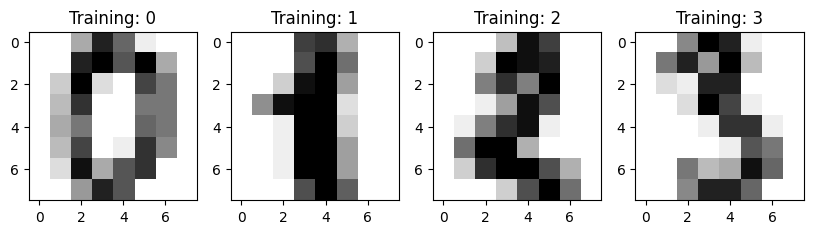

In [10]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

In [15]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data = data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size = 0.3)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **Predict Test Data**

In [33]:
y_pred = rf.predict(X_test)

In [34]:
y_pred

array([6, 9, 7, 0, 5, 7, 4, 6, 3, 3, 9, 9, 9, 3, 2, 2, 7, 3, 7, 4, 8, 2,
       8, 3, 5, 5, 4, 0, 8, 3, 6, 3, 1, 3, 4, 2, 0, 8, 4, 3, 5, 4, 6, 4,
       3, 5, 5, 2, 2, 4, 3, 9, 1, 5, 9, 6, 5, 5, 3, 7, 9, 7, 0, 0, 9, 0,
       2, 8, 0, 8, 5, 9, 6, 3, 5, 1, 5, 2, 8, 8, 6, 5, 7, 9, 2, 9, 9, 2,
       4, 0, 8, 4, 6, 7, 9, 3, 5, 9, 2, 7, 5, 5, 3, 9, 9, 8, 7, 5, 1, 6,
       2, 8, 5, 6, 7, 8, 2, 5, 6, 4, 9, 4, 4, 2, 6, 9, 7, 3, 0, 8, 9, 4,
       9, 9, 3, 5, 3, 2, 2, 4, 9, 2, 9, 1, 4, 4, 8, 2, 4, 0, 6, 1, 1, 6,
       5, 3, 5, 9, 5, 2, 7, 3, 6, 9, 0, 9, 9, 5, 3, 5, 0, 5, 6, 7, 4, 8,
       6, 4, 4, 0, 5, 6, 4, 0, 5, 0, 7, 0, 9, 7, 4, 3, 8, 5, 5, 7, 5, 1,
       1, 9, 4, 8, 9, 2, 0, 5, 0, 4, 5, 5, 3, 7, 2, 4, 2, 4, 3, 7, 6, 8,
       3, 6, 1, 6, 5, 6, 1, 3, 9, 7, 8, 3, 1, 8, 7, 2, 3, 9, 4, 1, 2, 7,
       3, 9, 1, 2, 0, 1, 6, 9, 4, 3, 6, 9, 1, 9, 0, 0, 6, 2, 9, 1, 3, 9,
       3, 8, 9, 0, 8, 7, 8, 1, 7, 2, 3, 8, 3, 7, 1, 4, 4, 7, 8, 7, 1, 8,
       4, 4, 6, 3, 4, 0, 5, 1, 6, 4, 4, 6, 8, 9, 1,

# **Model Accuracy**

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test, y_pred)

array([[57,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  0,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  1, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 54]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        56
           3       0.98      1.00      0.99        59
           4       0.98      0.97      0.98        61
           5       0.97      0.95      0.96        60
           6       1.00      0.97      0.98        62
           7       0.94      1.00      0.97        46
           8       0.93      0.93      0.93        40
           9       0.96      0.95      0.96        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## **Explaination**

1. **Objective**

  The objective of this analysis is to classify handwritten digits using the digits dataset, which consists of 8x8 pixel images. Each image is represented by an 8x8 array of grayscale values. The goal is to use these pixel values to predict the digit that each image represents.

2. **Import Libraries**

  **The necessary libraries for this analysis are imported:**

  pandas and numpy for data manipulation and numerical operations.
  matplotlib.pyplot for plotting and visualizing the data.
  sklearn.datasets for loading the digit dataset.

3. **Import Data**

  The digits dataset is imported using load_digits() from sklearn.datasets. This dataset includes images of handwritten digits (0-9) along with their corresponding labels (targets). A sample of the first four images is visualized to understand the structure and appearance of the digit images.

4. **Data Preprocessing**
  **Preprocessing involves several steps:**

  Checking the shape of the images to understand their dimensions. The dataset consists of 1797 images, each of size 8x8 pixels.
  Reshaping the images from 8x8 arrays to 64-element vectors, preparing them for model training. The reshaped dataset has a shape of (1797, 64).
  Scaling the image data by dividing each pixel value by 16. This normalization step ensures that the pixel values range between 0 and 1, which can improve model performance.

5. **Train Test Split**

  The dataset is divided into training and testing sets using train_test_split from sklearn.model_selection. Typically, 70% of the data is allocated for training the model, and 30% is reserved for testing its performance.

6. **Random Forest Model**

  A Random Forest classifier is chosen for this classification task. The Random Forest algorithm is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes for classification tasks. The model is trained on the training data using the fit method.

7. **Predict Test Data**

  After training, the Random Forest model is used to predict the labels of the test data. The predictions are generated using the predict method.

8. **Model Accuracy**

  The performance of the model is evaluated using a confusion matrix and a classification report. These metrics provide insights into various performance measures such as accuracy, precision, recall, and F1-score. The confusion matrix shows the number of correct and incorrect predictions, while the classification report summarizes the overall performance of the model.